<a href="https://colab.research.google.com/github/babakkeshavarz/time_series/blob/main/HoltWinters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col = 'Month' , parse_dates = True)

<Axes: xlabel='Month'>

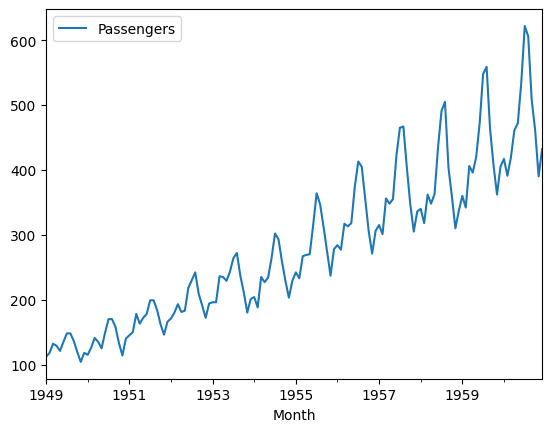

In [4]:
df.plot()

In [5]:
!pip install -U statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
## we set the frequency inside the index for the model creation
df.index.freq = 'MS'

In [8]:
##### Let's do some forecasting
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [9]:
#### boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
hw = ExponentialSmoothing(train['Passengers'],
                          initialization_method = 'legacy-heuristic',
                          trend='add',
                          seasonal = 'add',
                          seasonal_periods= 12)
res_hw = hw.fit()

In [12]:
df.loc[train_idx , 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx , 'HoltWinters'] = res_hw.forecast(N_test)


<Axes: xlabel='Month'>

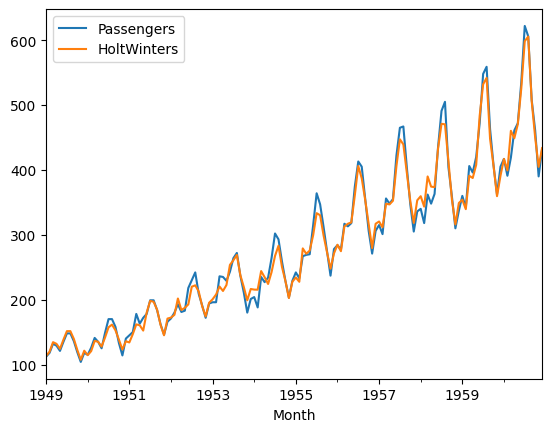

In [13]:
df[['Passengers', 'HoltWinters']].plot()

In [14]:
def rmse(y , t):
  return np.sqrt(np.mean((y-t)**2))

In [15]:
def mae(y , t):
  return np.mean(np.abs(y-t))

In [16]:
print("Train rmse: ",  rmse(train['Passengers'], res_hw.fittedvalues) )
print("Test rmse: ",  rmse(test['Passengers'], res_hw.forecast(N_test)) )

Train rmse:  11.853000976828765
Test rmse:  15.543003084126884


In [17]:
print("Train mae: ",  mae(train['Passengers'], res_hw.fittedvalues) )
print("Test mae: ",  mae(test['Passengers'], res_hw.forecast(N_test)) )

Train mae:  8.892127530485896
Test mae:  10.43776563928059


<Axes: xlabel='Month'>

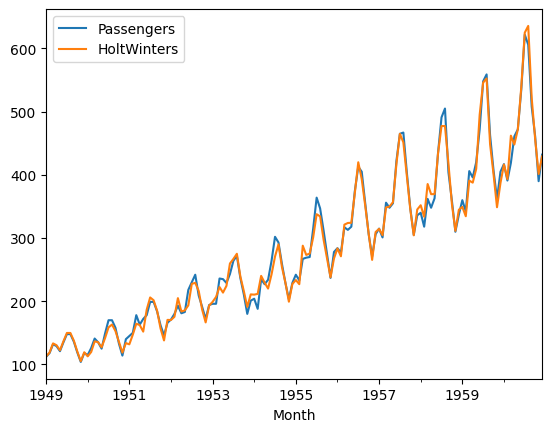

In [18]:
hw = ExponentialSmoothing(train['Passengers'],
                          initialization_method = 'legacy-heuristic',
                          trend='add',
                          seasonal = 'mul',
                          seasonal_periods= 12)
res_hw = hw.fit()
df.loc[train_idx , 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx , 'HoltWinters'] = res_hw.forecast(N_test)
df[['Passengers', 'HoltWinters']].plot()

In [19]:
print("Train rmse: ",  rmse(train['Passengers'], res_hw.fittedvalues) )
print("Test rmse: ",  rmse(test['Passengers'], res_hw.forecast(N_test)) )

Train rmse:  10.153934838980392
Test rmse:  16.535212108255575
